In [21]:
import  numpy as np
import  matplotlib.pyplot as plt
import cv2
import pandas as pd
import requests
import cv2
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from sklearn.preprocessing import normalize
import pickle

In [22]:
with open('data.pkl', 'rb') as f:
    data = pickle.load(f)

# open csv
tfidf = pd.read_csv('tfidf.csv')


In [23]:
data.head()

,Unnamed: 0,Image,Review Text,Image_Vectors
0,3452,[https://images-na.ssl-images-amazon.com/image...,love vintag spring vintag strat good tension g...,"[[[0.39485234, 0.55927205, 0.43934655, 0.38080..."
1,1205,[https://images-na.ssl-images-amazon.com/image...,work great guitar bench mat rug enough abus ta...,"[[[0.38690838, 0.59093606, 0.47527072, 0.42505..."
2,1708,[https://images-na.ssl-images-amazon.com/image...,use everyth acoust bass ukulel know smaller mo...,"[[[0.38690838, 0.59093606, 0.47527072, 0.42505..."
3,2078,[https://images-na.ssl-images-amazon.com/image...,great price good qualiti didnt quit match radi...,"[[[0.38690838, 0.59093606, 0.47527072, 0.42505..."
4,801,[https://images-na.ssl-images-amazon.com/image...,bought bass split time primari bass dean edg m...,"[[[0.39485234, 0.55927205, 0.43934655, 0.38080..."


In [24]:
tfidf.head()

,love,vintag,spring,strat,good,tension,great,stabil,float,bridg,...,mayer,importantli,toneprint,stringthru,stopflair,biggi,accord,screenshot,amazoncom,piti
0,0.060206,0.23263,0.28732,0.091102,0.045883,0.139794,0.032990,0.139794,0.168192,0.097901,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.00000,0.00000,0.000000,0.029924,0.000000,0.021515,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.00000,0.00000,0.000000,0.057354,0.000000,0.041238,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.010758,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
def text_similarity_Score_Tfidf(doci, docj):
    # use tfidf doc indices using cosine similarity
    tfidf1 = tfidf.iloc[doci]
    tfidf2 = tfidf.iloc[docj]


    # calculate the cosine similarity
    similarity = np.dot(tfidf1, tfidf2) / (np.linalg.norm(tfidf1) * np.linalg.norm(tfidf2))
    return similarity

print(text_similarity_Score_Tfidf(0, 1))

0.011436966078170142


In [26]:
# Load the dataset back
with open('SmMatrix.pkl', 'rb') as f:
    simlarity_M = pickle.load(f)

# Print loaded data to verify
print(simlarity_M)

[[1.         0.01143697 0.         ... 0.04115934 0.00579834 0.01287661]
 [0.01143697 1.         0.04238276 ... 0.04878733 0.0050277  0.01116522]
 [0.         0.04238276 1.         ... 0.02372865 0.00459945 0.01056071]
 ...
 [0.04115934 0.04878733 0.02372865 ... 1.         0.00144258 0.00331228]
 [0.00579834 0.0050277  0.00459945 ... 0.00144258 1.         0.03431545]
 [0.01287661 0.01116522 0.01056071 ... 0.00331228 0.03431545 1.        ]]


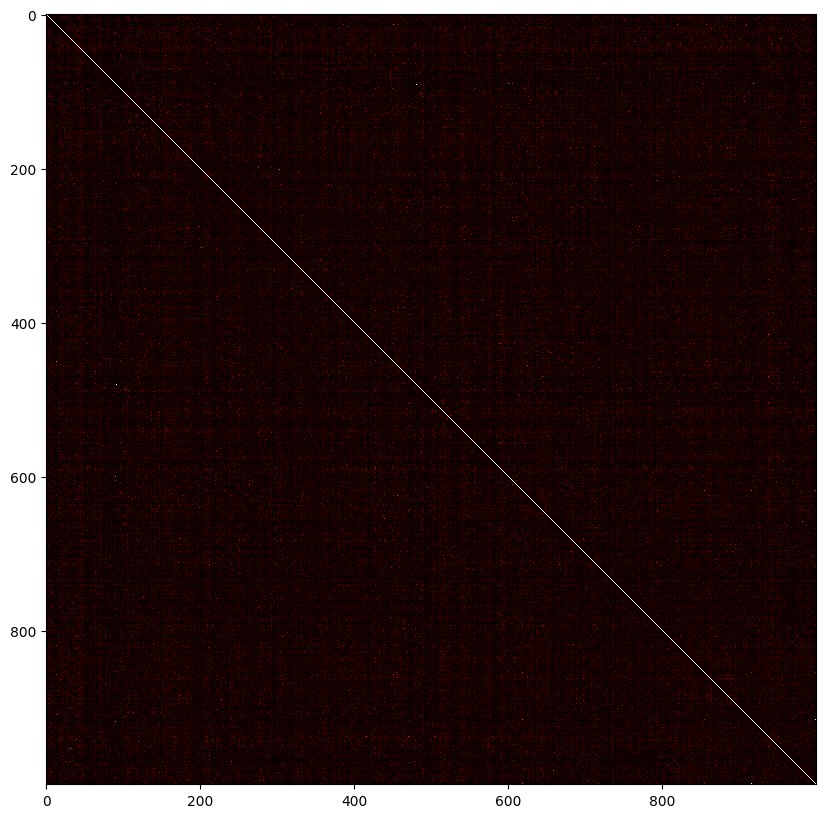

In [27]:
# plot the similarity matrix
plt.figure(figsize=(10, 10))
plt.imshow(simlarity_M, cmap='hot', interpolation='nearest')
plt.show()


In [28]:
data.head()

,Unnamed: 0,Image,Review Text,Image_Vectors
0,3452,[https://images-na.ssl-images-amazon.com/image...,love vintag spring vintag strat good tension g...,"[[[0.39485234, 0.55927205, 0.43934655, 0.38080..."
1,1205,[https://images-na.ssl-images-amazon.com/image...,work great guitar bench mat rug enough abus ta...,"[[[0.38690838, 0.59093606, 0.47527072, 0.42505..."
2,1708,[https://images-na.ssl-images-amazon.com/image...,use everyth acoust bass ukulel know smaller mo...,"[[[0.38690838, 0.59093606, 0.47527072, 0.42505..."
3,2078,[https://images-na.ssl-images-amazon.com/image...,great price good qualiti didnt quit match radi...,"[[[0.38690838, 0.59093606, 0.47527072, 0.42505..."
4,801,[https://images-na.ssl-images-amazon.com/image...,bought bass split time primari bass dean edg m...,"[[[0.39485234, 0.55927205, 0.43934655, 0.38080..."


In [29]:
def image_similarity(imgVector1, imgVector2):
    # calculate the cosine similarity
    similarity = np.dot(imgVector1, imgVector2) / (np.linalg.norm(imgVector1) * np.linalg.norm(imgVector2))
    return similarity



In [30]:
# find cosine similarity between two images

image_vectorsi= data['Image_Vectors'][0][0][0][0]
image_vectorsj= data['Image_Vectors'][1][0][0][0]
# normalise the vectors before calculting simlarity
image_vectorsi = normalize(image_vectorsi.reshape(1, -1))
image_vectorsj = normalize(image_vectorsj.reshape(1, -1))
print(data['Image_Vectors'][0][0][0],data['Image_Vectors'][0][0][0][3], data['Image_Vectors'][1][0][0], len(data['Image_Vectors'][1][0][0]))


print(image_similarity(image_vectorsi, image_vectorsj))



[0.39485234 0.55927205 0.43934655 ... 0.35669106 0.47609252 0.3402192 ] 0.38080218 [0.38690838 0.59093606 0.47527072 ... 0.35951015 0.47299284 0.34818882] 2048
[[1.]]


In [31]:
# for each document in the dataset load the list of image vectors and set image similarity scores of two doccuments as the value of most similar images using data 
# define an image similarity matrix
image_similarity_M = np.zeros((len(data), len(data)))


for i in range(len(data)):
    image_vectorsi= data.iloc[i]['Image_Vectors']
    for j in range(len(data)):
        image_vectorsj= data.iloc[j]['Image_Vectors']
        # iterate through all the image vectors in both vectors list and take the maximum
        max_similarity = 0
        for img1 in image_vectorsi:
            for img2 in image_vectorsj:
                similarity = image_similarity(img1, img2)
                if similarity > max_similarity:
                    max_similarity = similarity
        image_similarity_M[i][j] = max_similarity

# save the image similarity matrix in csv
image_similarity_M = pd.DataFrame(image_similarity_M)
image_similarity_M.to_csv('image_similarity.csv', index=False)




    

ValueError: shapes (1,2048) and (1,2048) not aligned: 2048 (dim 1) != 1 (dim 0)

In [32]:
# load data.pkl

with open('data.pkl', 'rb') as f:
    data = pickle.load(f)

data.head()

,Unnamed: 0,Image,Review Text,Image_Vectors
0,3452,[https://images-na.ssl-images-amazon.com/image...,love vintag spring vintag strat good tension g...,"[[[0.35204768, 0.53676, 0.49917382, 0.42068002..."
1,1205,[https://images-na.ssl-images-amazon.com/image...,work great guitar bench mat rug enough abus ta...,"[[[0.35107985, 0.5320194, 0.4778194, 0.4419130..."
2,1708,[https://images-na.ssl-images-amazon.com/image...,use everyth acoust bass ukulel know smaller mo...,"[[[0.38004225, 0.5307589, 0.4896015, 0.4049801..."
3,2078,[https://images-na.ssl-images-amazon.com/image...,great price good qualiti didnt quit match radi...,"[[[0.34581208, 0.55054736, 0.5456345, 0.385915..."
4,801,[https://images-na.ssl-images-amazon.com/image...,bought bass split time primari bass dean edg m...,"[[[0.3345537, 0.50541735, 0.48309487, 0.465147..."
